In [5]:
generate_data <- function(n, p, beta_star, sigma, tau, rho, theta = NA, cov_type = "AR", type = "lognormal") {
    # n: number of rows
    # p: number of columns
    # beta_star: true beta
    # sigma: noise level
    # tau: sd of measurement eror
    # rho: correlation between columns of W
    # theta: mean of W

    if (anyNA(theta)) theta <- c(rep(log(0.2 * p), 5), rep(0, p - 5))

    # Generate data
    if (cov_type == "AR") {
        W <- AR(n, p, rho) + rep(theta, each = n)
    } else if (cov_type == "CS") {
        Sigma <- sym_covariance_matrix(p, rho)
        W <- mvrnorm(n, mu = theta, Sigma = Sigma)
    } else {
        stop("cov_type must be either AR or CS")
    }
    B <- matrix(rnorm(n * p, mean = 0, sd = tau), nrow = n, ncol = p)
    Sig_B <- tau**2 * diag(p)
    if (type == "lognormal") {
        X <- exp(W) / rowSums(exp(W))
    } else if (type == "dirichlet") {
        X <- matrix(NA, n, p)
        for (i in 1:n) {
            X[i, ] <- rdirichlet(1, alpha = rep(1 / p, p))
            X[i, ][X[i, ] < 1e-10] <- 1e-10
        }
    } else {
        stop("type must be either lognormal or dirichlet")
    }
    sd.X <- apply(log(X), 2, sd)
    Z <- X * exp(B)
    row.sum.Z <- rowSums(Z)
    Z <- Z / rowSums(Z)
    Z <- log(Z)
    X <- log(X)

    y <- X %*% beta_star + rnorm(n, sd = sigma)

    # Return data
    return(list(X = X, Z = Z, y = y, Sig_B = Sig_B,rsZ=row.sum.Z, sd.X = sd.X))
}

AR <- function(n, p, rho) {
    z <- matrix(rnorm(n * p), n, p)
    X <- matrix(NA, n, p)
    X[, 1] <- z[, 1]
    for (j in 2:(p)) {
        X[, j] <- rho * X[, j - 1] + sqrt(1 - rho^2) * z[, j]
    }
    return(X)
}

[1] 1.05156
[1] 1.277909 6.146084


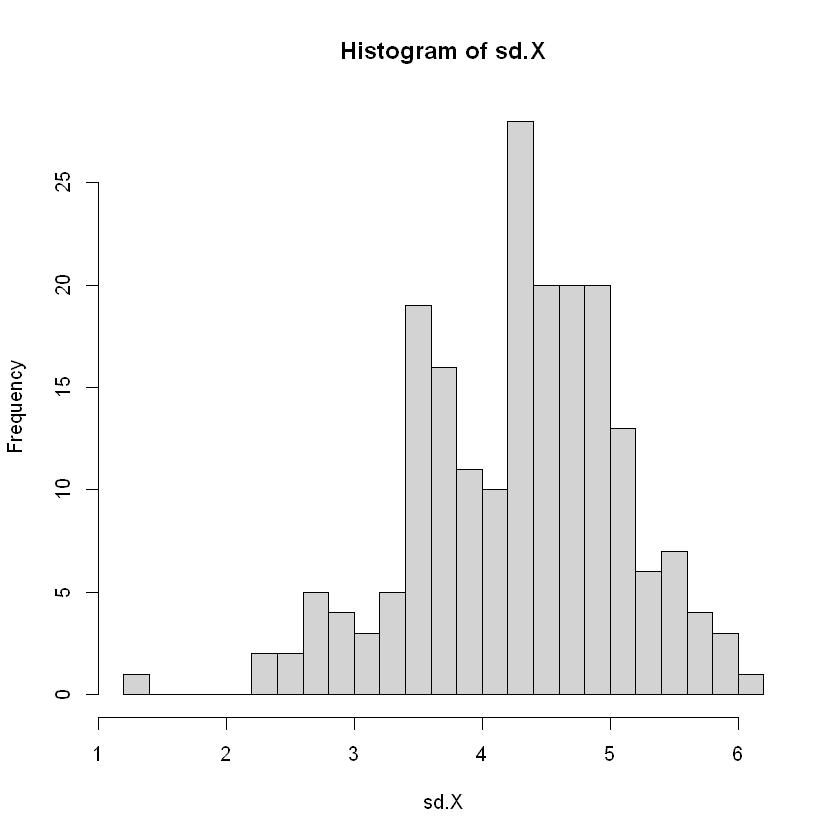

In [11]:
# simulation settings
# data_type <- "lognormal"
library(dirmult)
data_type <- "dirichlet"

N_sim <- 100
n <- 100
p <- 200
# create a list of different n and p values


sigma <- 0.5
rho <- 0.5
tau <- 0.5
beta_star <- c(1.2, -0.8, 0.7, 0, 0, -1.5, -1, 1.4, rep(0, p - 8))
theta <- c(rep(log(0.2 * p), 5), rep(0, p - 5))

data <- generate_data(n, p, beta_star, sigma, tau, rho, theta, type = data_type)
print(mean(abs(data$rsZ)))
print(range(data$sd.X))
sd.X <- data$sd.X
hist(sd.X, breaks = 20)
# print(data$X)

In [25]:
# Load the openxlsx package
install.packages("openxlsx")
library(openxlsx)

# Write df to an Excel file
write.xlsx(df, "df.xlsx")

package 'openxlsx' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\86151\AppData\Local\Temp\RtmpUFa4hu\downloaded_packages


Warning message:
"package 'openxlsx' was built under R version 4.2.3"


In [27]:
print(df)

    ind CoCo_n100_p200 CoCo_n250_p400 CoCo_n500_p500 Coda_n100_p200
1     1  -0.0372215009  -0.2890816973    0.102177487   1.369185e-08
2     2  -0.1596557169  -0.0772131028    0.049039524  -4.527570e-08
3     3  -0.1518814978  -0.1581037879    0.030346725  -4.337659e-07
4     4  -0.1063328626   0.1815784432   -0.043011200  -1.262300e-06
5     5   0.0525688319  -0.1667208638   -0.186403108  -1.402992e-06
6     6   0.1384668670  -0.0850584659   -0.099133176   2.310041e-07
7     7  -0.1144485465   0.1543261749   -0.196085302  -1.574509e-09
8     8   0.2021815120   0.1636620682   -0.086092131   4.728984e-07
9     9   0.2750752035   0.0005375881   -0.069101825  -2.509758e-07
10   10   0.5544708792  -0.0125809628   -0.098711453   7.389281e-08
11   11   0.2034130754   0.3236771996   -0.016280000   2.806546e-06
12   12  -0.2187801322   0.0247747858    0.057971468  -6.334881e-08
13   13   0.0232901441  -0.0577857352    0.074912865  -3.642120e-07
14   14  -0.2298366446  -0.1657682252    0.20241

In [28]:
print(mean(df[,2]))

[1] 0.01926764
